## Forage simulation for Accenture's social buzz data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


### Analyze 3 csv files, content, reactions and reactiontype

In [2]:
content=pd.read_csv("/Users/farhana/Desktop/Pythondata/Accenture_Forage/Content.csv")

content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [3]:
reactions=pd.read_csv("/Users/farhana/Desktop/Pythondata/Accenture_Forage/Reactions.csv")
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [122]:
reactiontype=pd.read_csv("/Users/farhana/Desktop/Pythondata/ReactionTypes.csv")
reactiontype.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [123]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


### Step 1: Data cleansing

In [124]:
content.drop(columns=['User ID','URL'], inplace=True)
content.head()

,Unnamed: 0,Content ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [125]:
rows_with_quotes = content['Category'].str.contains('"').sum()

if rows_with_quotes == 0:
    print("All quotation marks have been replaced.")
else:
    print(f"There are {rows_with_quotes} rows still containing quotation marks.")

There are 17 rows still containing quotation marks.


In [126]:
#Replace the quotation marks in some Category columns

content['Category']=content['Category'].replace({'[""]':''},regex=True)


In [127]:
rows_with_quotes = content['Category'].str.contains('"').sum()
if rows_with_quotes == 0:
    print("All quotation marks have been replaced.")
else:
    print(f"There are {rows_with_quotes} rows still containing quotation marks.")

All quotation marks have been replaced.


In [6]:
print(content.loc[50])

Unnamed: 0                                      50
Content ID    2d949603-6676-4402-900b-2c2c78315ea0
User ID       4baf648a-0ad5-412d-8250-5a0ff9289fbf
Type                                         audio
Category                                 "culture"
URL                                            NaN
Name: 50, dtype: object


In [129]:
# Check for any missings in 'content' dataset
missing_rows = content[content.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [Unnamed: 0, Content ID, Type, Category]
Index: []


In [130]:
content_nomissrow=content.dropna()
content_nomissrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [131]:
content=content_nomisscol.rename(columns={'Type':'Content Type'})
content.head()

,Unnamed: 0,Content ID,User ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


Data cleansing for 'reactions' dataframe

In [132]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [133]:
reactions.drop(columns=['User ID'], inplace=True)
reactions.head()


,Unnamed: 0,Content ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [134]:
reactions=reactions.rename(columns={'Type':'Reaction Type'})
reactions.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [135]:
missing_values=reactions.isnull()
print(missing_values)

       Unnamed: 0  Content ID  Reaction Type  Datetime
0           False       False           True     False
1           False       False          False     False
2           False       False          False     False
3           False       False          False     False
4           False       False          False     False
...           ...         ...            ...       ...
25548       False       False          False     False
25549       False       False          False     False
25550       False       False          False     False
25551       False       False          False     False
25552       False       False          False     False

[25553 rows x 4 columns]


In [136]:
missing_rows = reactions[reactions.isnull().any(axis=1)]
print(missing_rows)

       Unnamed: 0                            Content ID Reaction Type  \
0               0  97522e57-d9ab-4bd6-97bf-c24d952602d2           NaN   
46             46  9f737e0a-3cdd-4d29-9d24-753f4e3be810           NaN   
62             62  230c4e4d-70c3-461d-b42c-ec09396efb3f           NaN   
94             94  356fff80-da4d-4785-9f43-bc1261031dc6           NaN   
102           102  01ab84dd-6364-4236-abbb-3f237db77180           NaN   
...           ...                                   ...           ...   
25445       25445  b4cef9ef-627b-41d7-a051-5961b0204ebb           NaN   
25449       25449  7a79f4e4-3b7d-44dc-bdef-bc990740252c           NaN   
25454       25454  435007a5-6261-4d8b-b0a4-55fdc189754b           NaN   
25499       25499  4e4c9690-c013-4ee7-9e66-943d8cbd27b7           NaN   
25540       25540  75d6b589-7fae-4a6d-b0d0-752845150e56           NaN   

                  Datetime  
0      2021-04-22 15:17:15  
46     2020-12-04 20:00:31  
62     2021-03-19 08:19:38  
94     

In [139]:
reactions=reactions.dropna()
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
dtypes: int64(1), object(3)
memory usage: 959.9+ KB


In [140]:
missing_values=reactions.isnull()
print(missing_values)

       Unnamed: 0  Content ID  Reaction Type  Datetime
1           False       False          False     False
2           False       False          False     False
3           False       False          False     False
4           False       False          False     False
5           False       False          False     False
...           ...         ...            ...       ...
25548       False       False          False     False
25549       False       False          False     False
25550       False       False          False     False
25551       False       False          False     False
25552       False       False          False     False

[24573 rows x 4 columns]


Data cleansing for 'reactiontype' dataframe

In [141]:
reactiontype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [142]:
print(reactiontype)

    Unnamed: 0         Type Sentiment  Score
0            0        heart  positive     60
1            1         want  positive     70
2            2      disgust  negative      0
3            3         hate  negative      5
4            4   interested  positive     30
5            5  indifferent   neutral     20
6            6         love  positive     65
7            7   super love  positive     75
8            8      cherish  positive     70
9            9        adore  positive     72
10          10         like  positive     50
11          11      dislike  negative     10
12          12    intrigued  positive     45
13          13      peeking   neutral     35
14          14       scared  negative     15
15          15      worried  negative     12


In [143]:
reactiontype=reactiontype.rename(columns={'Type':'Reaction Type'})
print(reactiontype)

    Unnamed: 0 Reaction Type Sentiment  Score
0            0         heart  positive     60
1            1          want  positive     70
2            2       disgust  negative      0
3            3          hate  negative      5
4            4    interested  positive     30
5            5   indifferent   neutral     20
6            6          love  positive     65
7            7    super love  positive     75
8            8       cherish  positive     70
9            9         adore  positive     72
10          10          like  positive     50
11          11       dislike  negative     10
12          12     intrigued  positive     45
13          13       peeking   neutral     35
14          14        scared  negative     15
15          15       worried  negative     12


In [144]:
reactiontype.head()

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [145]:
reactions.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [146]:
content.head()


,Unnamed: 0,Content ID,User ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


### Merging the 'content' and 'reactions' dataframe 

In [151]:
merged_df = reactions.merge(content, on='Content ID', how='left')

merged_df.head()

,Unnamed: 0_x,Content ID,Reaction Type,Datetime,Unnamed: 0_y,User ID,Content Type,Category
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying


In [152]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20056 entries, 0 to 20055
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0_x   20056 non-null  int64 
 1   Content ID     20056 non-null  object
 2   Reaction Type  20056 non-null  object
 3   Datetime       20056 non-null  object
 4   Unnamed: 0_y   20056 non-null  int64 
 5   User ID        20056 non-null  object
 6   Content Type   20056 non-null  object
 7   Category       20056 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


### Merging with 'reactiontype' dataframe to produce final dataframe

In [154]:
final_df=merged_df.merge(reactiontype, on = 'Reaction Type', how='left')
final_df.head()

,Unnamed: 0_x,Content ID,Reaction Type,Datetime,Unnamed: 0_y,User ID,Content Type,Category,Unnamed: 0,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,2,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,11,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,14,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,2,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,4,positive,30


In [160]:
final=final_df.drop(columns=['Unnamed: 0','Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
final.head()

,Content ID,Reaction Type,Datetime,User ID,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,positive,30


In [161]:
final.describe()

,Score
count,20056.000000
mean,39.762016
std,26.031474
min,0.000000
25%,15.000000
50%,45.000000
75%,65.000000
max,75.000000


In [163]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20056 entries, 0 to 20055
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     20056 non-null  object
 1   Reaction Type  20056 non-null  object
 2   Datetime       20056 non-null  object
 3   User ID        20056 non-null  object
 4   Content Type   20056 non-null  object
 5   Category       20056 non-null  object
 6   Sentiment      20056 non-null  object
 7   Score          20056 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [165]:

final['Reaction Type'].value_counts()


heart          1332
scared         1278
indifferent    1278
interested     1273
super love     1273
want           1269
love           1266
hate           1259
peeking        1256
adore          1248
like           1240
disgust        1236
dislike        1233
cherish        1218
intrigued      1199
worried        1198
Name: Reaction Type, dtype: int64

In [166]:
final['Content Type'].value_counts()


photo    5463
video    5059
GIF      4866
audio    4668
Name: Content Type, dtype: int64

In [167]:
final['Category'].value_counts()



travel             1494
science            1475
animals            1443
healthy eating     1422
cooking            1394
culture            1326
food               1293
tennis             1258
technology         1256
education          1232
soccer             1161
dogs               1142
fitness            1141
veganism           1032
public speaking     994
studying            948
Studying             45
Name: Category, dtype: int64

In [168]:
final['Sentiment'].value_counts()

positive    11318
negative     6204
neutral      2534
Name: Sentiment, dtype: int64

In [171]:
# Identify top 5 categories based on summed scores
top_5_categories = final.groupby('Category')['Score'].sum().nlargest(5).index.tolist()

print(top_5_categories)


['travel', 'science', 'healthy eating', 'animals', 'cooking']


In [173]:
# Filter merged_df to include only rows corresponding to top 5 categories
finalfive = final[final['Category'].isin(top_5_categories)]

finalfive.head(20)


,Content ID,Reaction Type,Datetime,User ID,Content Type,Category,Sentiment,Score
45,9f737e0a-3cdd-4d29-9d24-753f4e3be810,dislike,2020-06-25 17:01:58,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,negative,10
46,9f737e0a-3cdd-4d29-9d24-753f4e3be810,intrigued,2020-09-13 00:11:50,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,positive,45
47,9f737e0a-3cdd-4d29-9d24-753f4e3be810,peeking,2020-08-20 18:17:06,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,neutral,35
48,9f737e0a-3cdd-4d29-9d24-753f4e3be810,scared,2021-02-11 04:53:56,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,negative,15
49,9f737e0a-3cdd-4d29-9d24-753f4e3be810,hate,2021-03-08 10:40:53,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,negative,5
50,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,negative,0
51,9f737e0a-3cdd-4d29-9d24-753f4e3be810,hate,2021-05-25 01:00:28,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,negative,5
52,9f737e0a-3cdd-4d29-9d24-753f4e3be810,like,2021-03-15 12:17:43,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,positive,50
53,9f737e0a-3cdd-4d29-9d24-753f4e3be810,love,2021-05-05 16:26:43,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,positive,65
54,9f737e0a-3cdd-4d29-9d24-753f4e3be810,love,2020-08-31 00:21:56,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,positive,65


In [174]:
finalfive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7228 entries, 45 to 19955
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     7228 non-null   object
 1   Reaction Type  7228 non-null   object
 2   Datetime       7228 non-null   object
 3   User ID        7228 non-null   object
 4   Content Type   7228 non-null   object
 5   Category       7228 non-null   object
 6   Sentiment      7228 non-null   object
 7   Score          7228 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 508.2+ KB


In [177]:
finalfive.to_excel('/Users/farhana/Desktop/Pythondata/finalfive.xlsx', index=False)


In [181]:
finalfive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7228 entries, 45 to 19955
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     7228 non-null   object
 1   Reaction Type  7228 non-null   object
 2   Datetime       7228 non-null   object
 3   User ID        7228 non-null   object
 4   Content Type   7228 non-null   object
 5   Category       7228 non-null   object
 6   Sentiment      7228 non-null   object
 7   Score          7228 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 508.2+ KB


In [178]:
final=pd.read_csv("/Users/farhana/Desktop/Pythondata/Task 3_Final.csv")
final.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [180]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


Text(0, 0.5, 'Content Category')

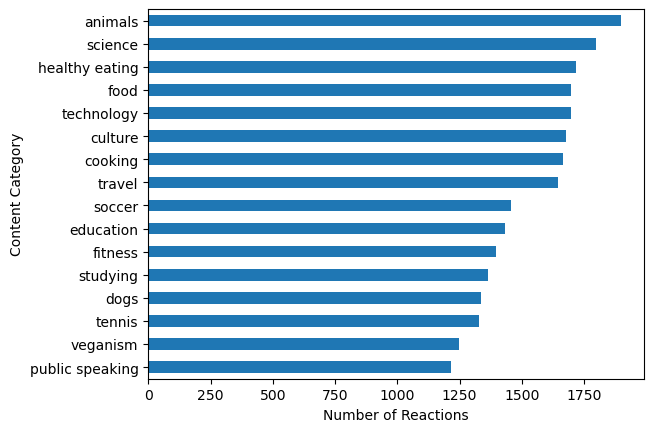

In [221]:
pd.value_counts(final['Category']).iloc[::-1].plot.barh()
plt.xlabel('Number of Reactions')
plt.ylabel('Content Category')

Text(0, 0.5, 'Sentiment Type')

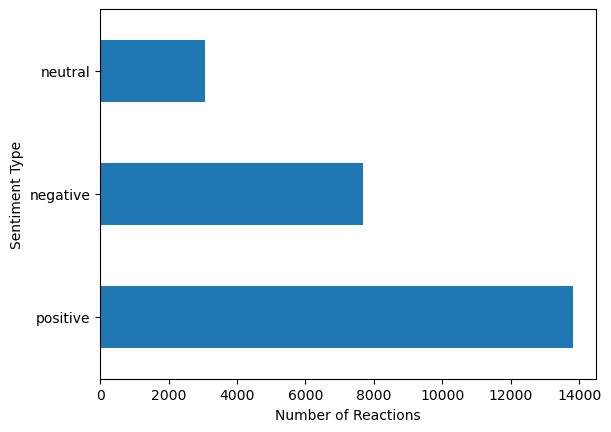

In [230]:
pd.value_counts(final['Sentiment']).plot.barh()
plt.xlabel('Number of Reactions')
plt.ylabel('Sentiment Type')

## Identify the top 5 content categories based on the number of reactions

In [234]:

top5_categories = final['Category'].value_counts().head(5)

# Find out how many unique categories there are
num_unique_categories = final['Category'].nunique()

top5_categories, num_unique_categories


(animals           1897
 science           1796
 healthy eating    1717
 food              1699
 technology        1698
 Name: Category, dtype: int64,
 16)

In [198]:
def rstr(data):
    structural_info = pd.DataFrame(index=data.columns)
    structural_info['unique_len'] = data.apply(lambda x: len(x.unique()))
    structural_info['unique_val'] = data.apply(lambda x: x.unique())
    print(data.shape)
    return structural_info

rstr(final)


(24573, 8)


,unique_len,unique_val
Unnamed: 0,24573,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Content ID,962,"[97522e57-d9ab-4bd6-97bf-c24d952602d2, 9f737e0..."
Reaction Type,16,"[disgust, dislike, scared, interested, peeking..."
Datetime,24010,"[7/11/20 9:43, 17/6/21 12:22, 18/4/21 5:13, 6/..."
Content Type,4,"[photo, video, GIF, audio]"
Category,16,"[studying, healthy eating, technology, food, c..."
Sentiment,3,"[negative, positive, neutral]"
Score,15,"[0, 10, 15, 30, 35, 70, 5, 65, 20, 75, 45, 12,..."


In [202]:
# Number of reactions to the most popular category (Animals)
num_reactions_most_popular = top_5_categories.iloc[0]

# Convert the 'Datetime' column to datetime format and extract the month and year
final['Month_Year'] = pd.to_datetime(final['Datetime']).dt.to_period('M')

# Identify the month with the most posts
month_most_posts = final['Month_Year'].value_counts().idxmax()
num_posts_in_month = final['Month_Year'].value_counts().max()

num_reactions_most_popular, month_most_posts, num_posts_in_month


(1897, Period('2021-01', 'M'), 1708)

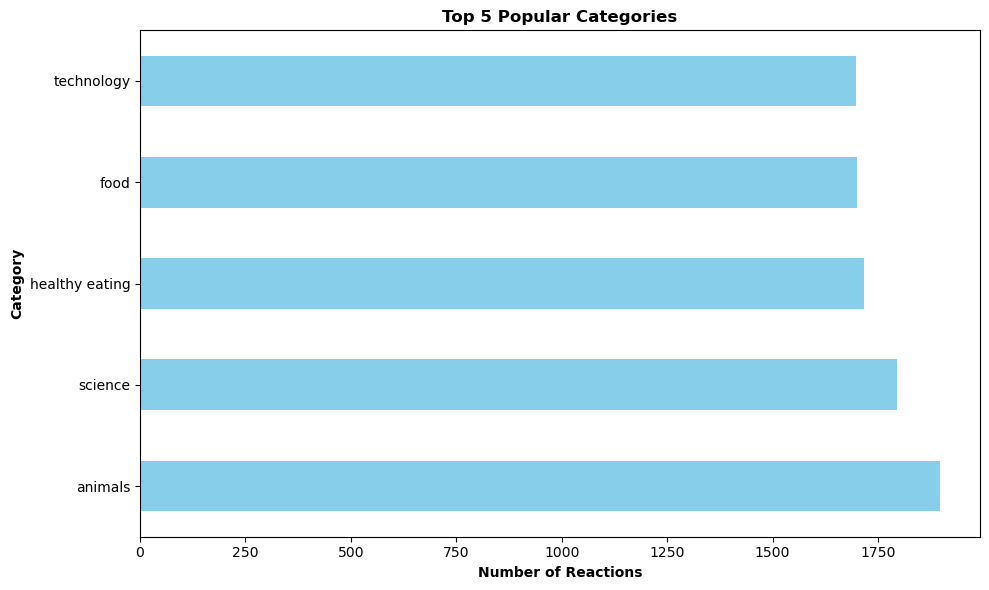

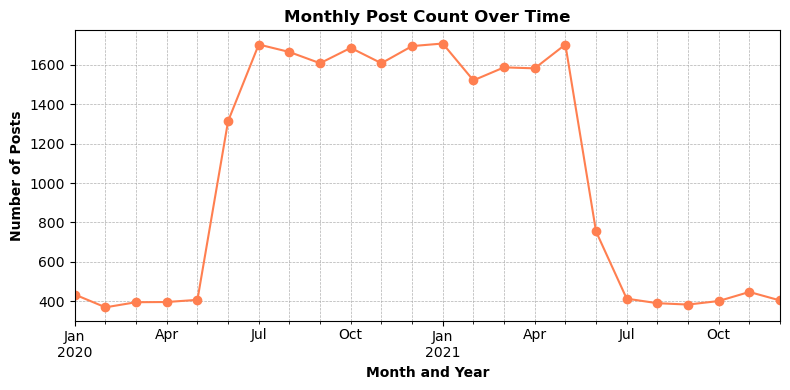

In [229]:
import matplotlib.pyplot as plt
top5_categories = top5_categories[::-1]
# Plotting the top 5 categories based on reaction counts
plt.figure(figsize=(10, 6))
top5_categories.plot(kind='barh', color='skyblue')
plt.title('Top 5 Popular Categories', weight='bold')
plt.ylabel('Category', weight='bold')
plt.xlabel('Number of Reactions', weight='bold')
plt.tight_layout()
plt.show()

# Plotting the number of posts over time (monthly post count)
plt.figure(figsize=(8, 4))
final['Month_Year'].value_counts().sort_index().plot(kind='line', marker='o', color='coral')
plt.title('Monthly Post Count Over Time', weight= 'bold')
plt.xlabel('Month and Year', weight = 'bold')
plt.ylabel('Number of Posts', weight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [240]:
top5_categories = final['Category'].value_counts().head(5).index.tolist()
filtered = final[final['Category'].isin(top5_categories)]
filtered.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Month_Year
45,45,9f737e0a-3cdd-4d29-9d24-753f4e3be810,dislike,25/6/20 17:01,photo,healthy eating,negative,10,2020-06
46,46,9f737e0a-3cdd-4d29-9d24-753f4e3be810,intrigued,13/9/20 0:11,photo,healthy eating,positive,45,2020-09
47,47,9f737e0a-3cdd-4d29-9d24-753f4e3be810,peeking,20/8/20 18:17,photo,healthy eating,neutral,35,2020-08
48,48,9f737e0a-3cdd-4d29-9d24-753f4e3be810,scared,11/2/21 4:53,photo,healthy eating,negative,15,2021-11
49,49,9f737e0a-3cdd-4d29-9d24-753f4e3be810,hate,8/3/21 10:40,photo,healthy eating,negative,5,2021-08


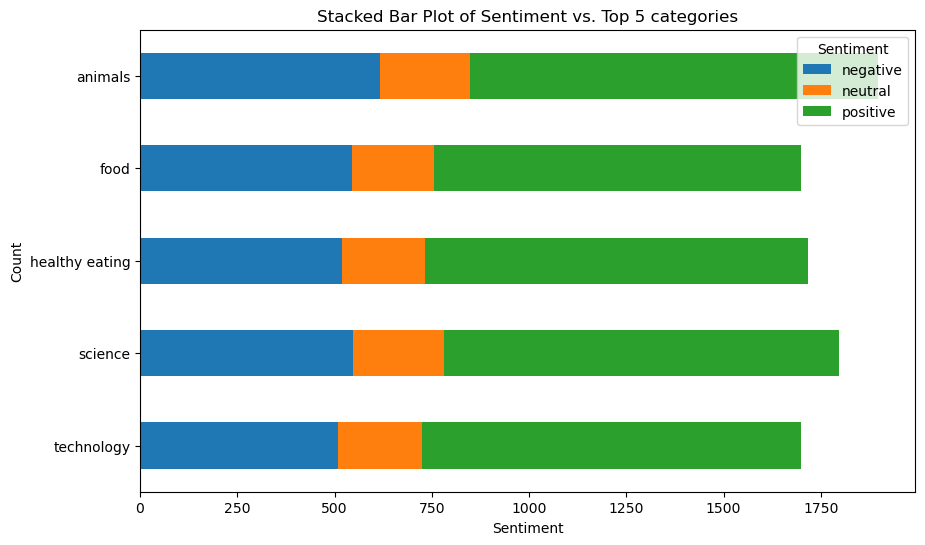

In [245]:
grouped_data = filtered.groupby(['Category', 'Sentiment']).size().unstack()
grouped_data = grouped_data.iloc[::-1]

grouped_data.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Sentiment vs. Top 5 categories')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

In [246]:
overall_sentiment_distribution = grouped_data.sum()


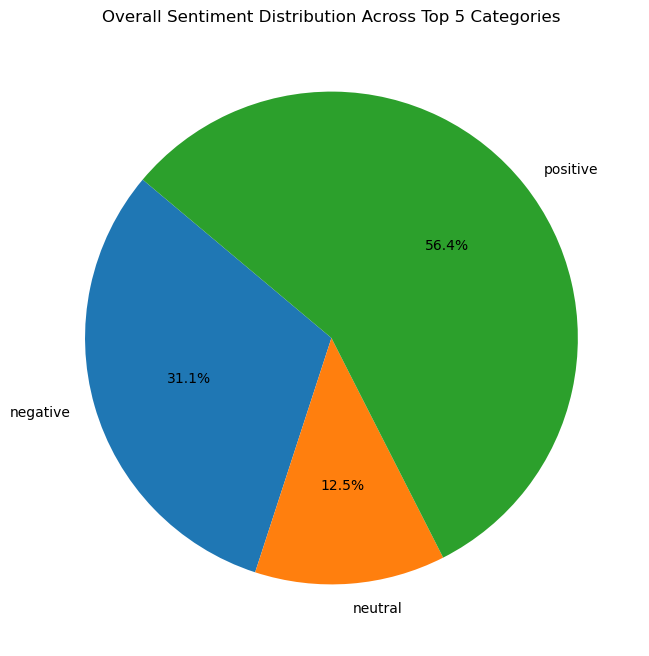

In [247]:
plt.figure(figsize=(8, 8))
overall_sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Overall Sentiment Distribution Across Top 5 Categories')
plt.ylabel('')  # This is to remove the default 'None' ylabel produced by pandas pie plot
plt.show()


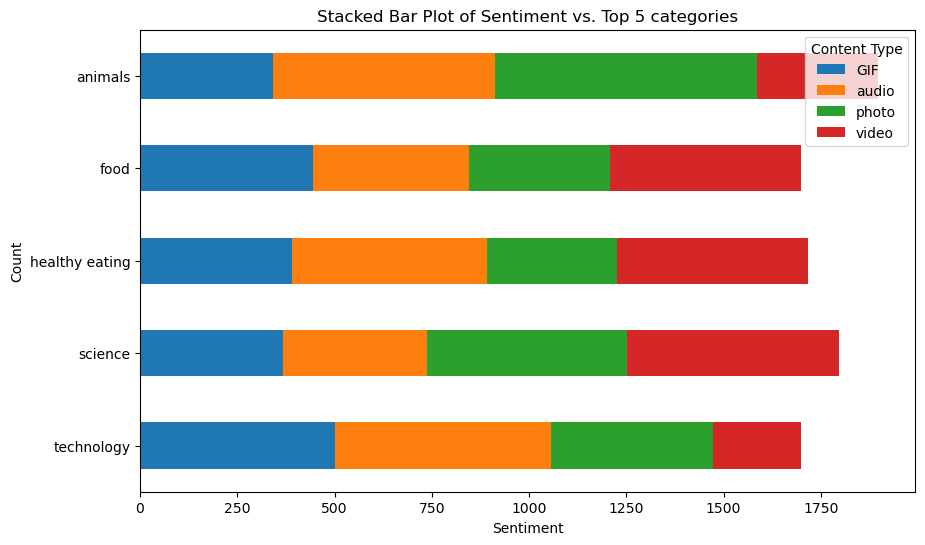

In [248]:
grouped_data = filtered.groupby(['Category', 'Content Type']).size().unstack()
grouped_data = grouped_data.iloc[::-1]

grouped_data.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Sentiment vs. Top 5 categories')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

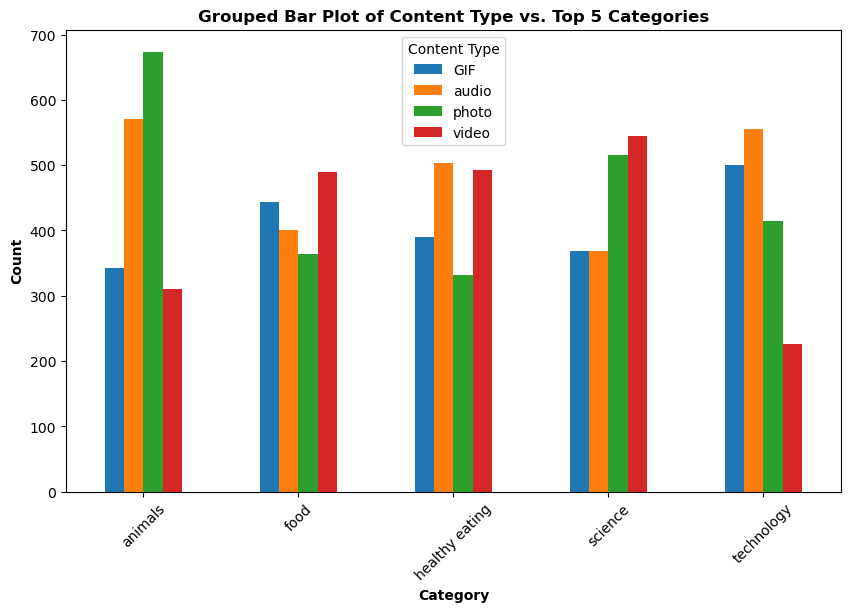

In [257]:
# Plotting using a grouped bar chart
grouped_data = grouped_data.iloc[::-1]
ax = grouped_data.plot(kind='bar', figsize=(10, 6), rot=45)

plt.title('Grouped Bar Plot of Content Type vs. Top 5 Categories', weight='bold')
plt.ylabel('Count', weight='bold')
plt.xlabel('Category', weight='bold')
plt.show()


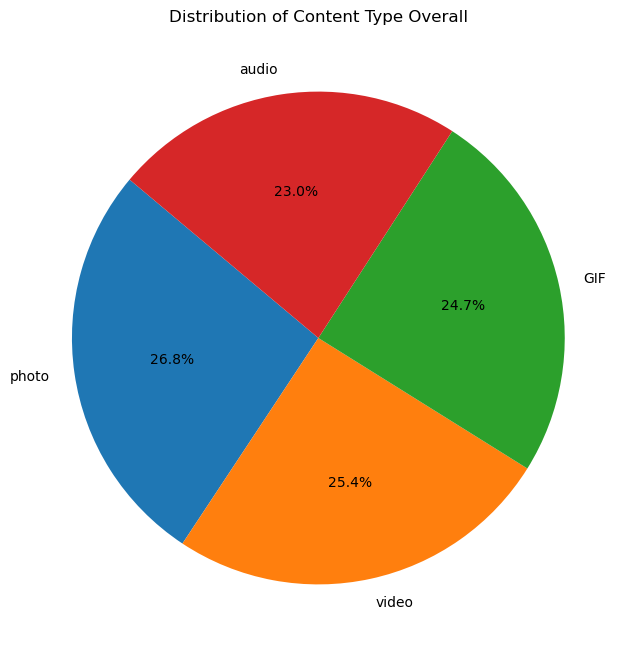

In [264]:
# Aggregate data by 'Content Type'
content_type_distribution = final['Content Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
content_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Type Overall')
plt.ylabel('')  # This is to remove the default 'None' ylabel produced by pandas pie plot
plt.show()


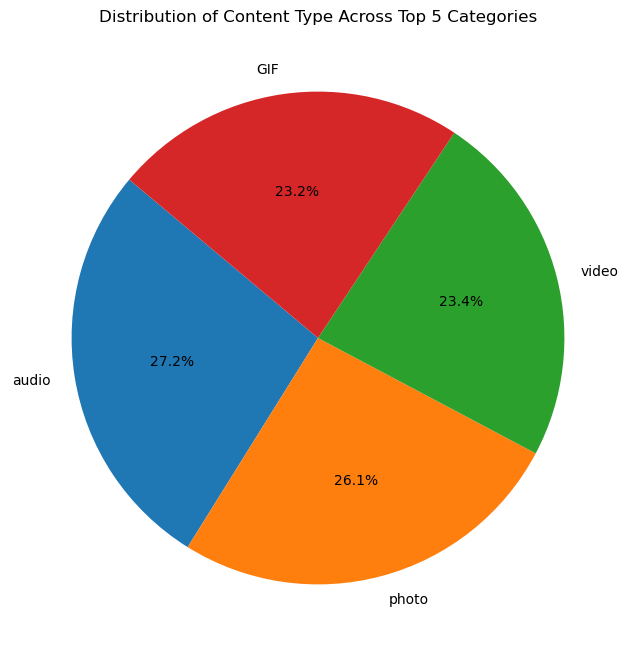

In [263]:
# Aggregate data by 'Content Type'
content_type_distribution = filtered['Content Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
content_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Type Across Top 5 Categories')
plt.ylabel('')  # This is to remove the default 'None' ylabel produced by pandas pie plot
plt.show()
